# Text generation metrics comparison

In [1]:
import pandas as pd
import numpy as np
#from zenml.client import Client
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy
from scipy.stats import mannwhitneyu, wilcoxon


plt.style.use("ggplot")

In [2]:
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_colwidth", 30)
 
#from github_search.pipelines.get_zenml_results import ArtifactLoader

In [4]:
#metrics_df.columns

In [14]:
!ls -l ../output/code2doc/

total 128
-rw-rw-r-- 1 kuba kuba     0 kwi 26  2024 assertion.log
-rw-rw-r-- 1 kuba kuba     0 kwi 26  2024 azure_openai_usage.log
-rw-rw-r-- 1 kuba kuba 12393 sty 16  2025 beir_results_qwen2.5:3b-instruct.csv
-rw-rw-r-- 1 kuba kuba 31699 wrz 11 17:11 beir_results_qwen2.5:7b-instruct.csv
-rw-rw-r-- 1 kuba kuba 12436 gru 20  2024 beir_results_with_modernbert_marco_qwen2.5:3b-instruct.csv
-rw-rw-r-- 1 kuba kuba 12393 sty 16  2025 beir_results_with_modernbert_qwen2.5:3b-instruct.csv
-rw-rw-r-- 1 kuba kuba 13932 sty 27  2025 beir_results_with_modernbert_qwen2.5:7b-instruct.csv
-rw-rw-r-- 1 kuba kuba     0 kwi 26  2024 openai_usage.log
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample_2k
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample2k
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample_per_task_5_repos
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample_per_task_7k
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample_per_task_9k
drwxrwxr-x 2 kuba kuba  4096 lis 29  2024 sample_small
drwxrwxr-x 2 ku

In [15]:
metrics_df = pd.read_csv("../output/code2doc/beir_results_qwen2.5:7b-instruct.csv")

metrics_df[["corpus", "retriever", "P@10", "Accuracy@10", "MRR@10"]]

,corpus,retriever,P@10,Accuracy@10,MRR@10
0,readme,all-mpnet-base-v2 (sentenc...,0.42507,0.92857,0.74217
1,readme,bm25,0.42278,0.91375,0.71066
2,readme,all-MiniLM-L12-v2 (sentenc...,0.40350,0.91914,0.75752
3,flat_code2doc_generated_re...,all-mpnet-base-v2 (sentenc...,0.34879,0.88005,0.65096
4,flat_code2doc_generated_re...,all-MiniLM-L12-v2 (sentenc...,0.34461,0.88679,0.67263
...,...,...,...,...,...
67,flat_repomap_code2doc_gene...,embeddinggemma-300m (sente...,0.00377,0.03774,0.01589
68,code2doc_generated_readme,embeddinggemma-300m (sente...,0.00377,0.03639,0.00820
69,repomap,embeddinggemma-300m (sente...,0.00377,0.03639,0.01191
70,repomap_code2doc_generated...,embeddinggemma-300m (sente...,0.00337,0.03235,0.01297


In [16]:
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_colwidth", 30)

#p = list(P("../data").rglob("*.jsonl"))[0]
#evaluated_df = pd.read_json(p, orient="records", lines=True).set_index("repo", drop=True)
#artifact = Client().get_artifact('8eb34559-0386-4f39-aa0a-8ef4ad1a0373')
#loaded_artifact = artifact.load()
#evaluated_df = artifact.load()
#evaluated_df = evaluated_df.rename(columns={"f1": "bertscore_f1", "recall": "bertscore_recall", "precision": "bertscore_precision"})

In [17]:
evaluated_df

NameError: name 'evaluated_df' is not defined

In [18]:
evaluated_df["generated_length"] = evaluated_df["generated_text"].str.split().apply(len)
evaluated_df["length"] = evaluated_df["true_tasks"].str.split().apply(len)
evaluated_df["edit_word"] = 1 / evaluated_df["edit_word"]

NameError: name 'evaluated_df' is not defined

In [19]:
generation_metrics_df = evaluated_df.select_dtypes("float").groupby(evaluated_df["repo"]).agg("mean")

NameError: name 'evaluated_df' is not defined

Used sampling: small (100 examples, for each repo tasks were generated 3 times)

## Comments

- starcoderbase-7b was used for generation
- all metrics have same monotonicity ("more is better")
- the correlations are Spearman's rho because using Pearson's correlation would be problematic
- sentence transformer similarity uses "paraphrase-distilroberta-base-v1", the score is cosine similarity of embeddings
- interestingly bertscore and sentence transformer score have different behavior with respect to text length

### Conclusion

We choose sentence_transformer_similarity, bertscore_f1 and rouge2 as they are representative of their clearly visible groups which are not correlated across other groups

In [20]:
sns.heatmap(generation_metrics_df.corr(method="kendall"))

NameError: name 'generation_metrics_df' is not defined

NameError: name 'evaluated_df' is not defined

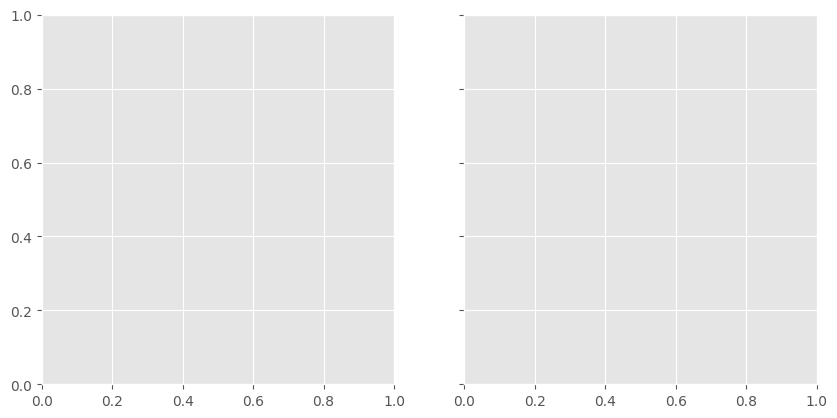

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_figwidth(10)

sns.regplot(evaluated_df, x="generated_length", y="bertscore_f1", ax=ax1)
sns.regplot(evaluated_df, x="length", y="bertscore_f1", ax=ax2)

NameError: name 'evaluated_df' is not defined

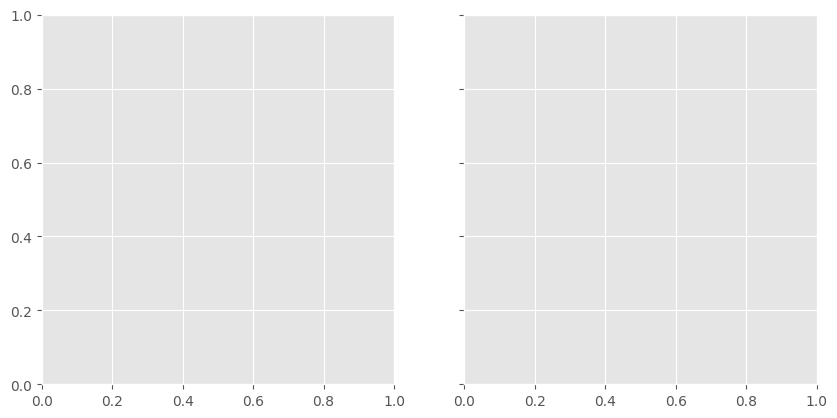

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_figwidth(10)

sns.regplot(evaluated_df, x="generated_length", y="sentence_transformer_similarity", ax=ax1)
sns.regplot(evaluated_df, x="length", y="sentence_transformer_similarity", ax=ax2)

## IR vs generation metrics

Used sampling: no_sampling

In [23]:
client = Client()

NameError: name 'Client' is not defined

In [24]:
#artifact = Client().get_artifact('01a912a3-66f1-4ea4-b549-05d1d01441f8')
#generated_texts_df = artifact.load()


In [25]:
#generated_texts_df.head()

In [26]:
def clip_inf(df, col):
    m = df.loc[df[col] != np.inf, col].max()
    df[col] = df[col].replace(np.inf ,m)
    return df

In [27]:
#artifact = Client().get_artifact('b7c725a8-3efa-459e-94c9-160793c89024')
artifact = Client().get_artifact('ba553891-6a9c-4457-a739-065a1ae6d037')
generation_metrics_df = clip_inf(artifact.load(), "wmd")

NameError: name 'Client' is not defined

In [28]:
artifact.step.name

NameError: name 'artifact' is not defined

In [29]:
generation_metrics_df.columns

NameError: name 'generation_metrics_df' is not defined

In [ ]:
#artifact = Client().get_artifact('e21141cd-92b5-4c28-9cf8-5865d7f21582'

OLD_RUN_ID = '53476d74-db41-4152-acf7-41c04af96c4f'
NEW_RUN_ID = '8fcc105d-f7eb-45a8-8284-c509200b0d7d'
artifact = Client().get_artifact(NEW_RUN_ID)

all_experiments_metrics_results = artifact.load()
metrics_results = all_experiments_metrics_results[0]

In [ ]:
metrics_results.ir_config.column_config

In [ ]:
import pprint
n_runs = len(metrics_results.generation_metrics)

In [ ]:
metrics_results.dict().keys()

In [ ]:
pd.DataFrame.from_records(metrics_results.generation_metrics[0])

In [ ]:
pd.DataFrame(metrics_results.aggregate_metrics[1]).describe()

In [ ]:
metrics_results.dict().keys()

In [ ]:
n_runs

In [ ]:
run_generation_metrics_dfs = [pd.DataFrame(metrics_results.generation_metrics[i]) for i in range(n_runs)]
all_generation_metrics_df = pd.concat(run_generation_metrics_dfs)

In [ ]:
run_per_query_ir_metrics_dfs =  [pd.DataFrame(metrics_results.per_query_metrics[i]).set_index("query").assign(generation=i) for i in range(n_runs)]
per_query_ir_metrics_df = pd.concat(run_per_query_ir_metrics_dfs)

In [ ]:
per_query_ir_metrics_df.groupby(per_query_ir_metrics_df.index).agg("mean")

In [ ]:
exploded_generation_metrics_df = (
    all_generation_metrics_df
    .explode("true_tasks").rename(columns={"true_tasks": "query"})
)
exploded_generation_metrics_df = clip_inf(exploded_generation_metrics_df, "wmd")

def positive_hmean(scores):
    return scipy.stats.hmean(np.maximum(0, scores))



In [ ]:
def aggregate_per_query_metrics(run_generation_metrics_df, run_ir_metrics_df):
    exploded_generation_metrics_df = (
    run_generation_metrics_df
        .explode("true_tasks").rename(columns={"true_tasks": "query"})
    )
    exploded_generation_metrics_df = clip_inf(exploded_generation_metrics_df, "wmd")

    per_query_generation_metrics_df = (
        exploded_generation_metrics_df
        .select_dtypes("number")
        .groupby(exploded_generation_metrics_df["query"])
        .agg("mean")
    )

    per_query_metrics_df = per_query_generation_metrics_df.merge(run_ir_metrics_df.groupby("query").agg("mean"), left_index=True, right_index=True)
    return per_query_metrics_df

def get_per_query_metrics_df(metrics_results):
    run_generation_metrics_dfs = [pd.DataFrame(metrics_results.generation_metrics[i]) for i in range(n_runs)]
    all_generation_metrics_df = pd.concat(run_generation_metrics_dfs)
    run_per_query_ir_metrics_dfs =  [pd.DataFrame(metrics_results.per_query_metrics[i]).set_index("query").assign(generation=i) for i in range(n_runs)]
    per_query_ir_metrics_df = pd.concat(run_per_query_ir_metrics_dfs)
    return aggregate_per_query_metrics(all_generation_metrics_df, per_query_ir_metrics_df)

In [ ]:

ir_metric_names = per_query_ir_metrics_df.select_dtypes("number").columns
generation_metric_names = exploded_generation_metrics_df.select_dtypes(include="number").columns

In [ ]:
per_query_metrics_df = get_per_query_metrics_df(metrics_results)

In [ ]:
per_query_metrics_df

In [ ]:
ir_metric_names = ["accuracy@10", "hits@10", "MRR@10"]
generation_metric_names = ["wmd", "bertscore_f1", "rougeL", "sentence_transformer_similarity"]

In [ ]:
def get_corr_df(per_query_metrics_df, ir_metric_names, generation_metric_names, method="spearman"):
    return per_query_metrics_df.corr(method="spearman").loc[
        ir_metric_names, generation_metric_names
    ]
    
def get_df_complement(df_subset, df):
    return df[~pd.Series(df.index).isin(df_subset.index).values]


def complement_mannwhitney(df_subset, df, metric):
    complement_df = get_df_complement(df_subset, df)
    return mannwhitneyu(df_subset[metric], complement_df[metric])

In [ ]:
ir_vs_generation_metrics_df = get_corr_df(per_query_metrics_df, ir_metric_names, generation_metric_names)

In [ ]:
def show_col_pairplots(df, ref_col, cols):
    fig, axes = plt.subplots(ncols=len(cols), sharey=True)
    fig.set_figwidth(15)
    for (col, ax) in zip(cols, axes):
        sns.regplot(df, x=ref_col, y=col, ax=ax)

def show_pairplots(df, ref_cols, cols):
    for col in ref_cols:
        show_col_pairplots(df, col, cols)

In [ ]:
per_query_metrics_df["accuracy@10"]

## Displaying results

## Generation metrics 

In [ ]:
for col in generation_metric_names:
    skewness = scipy.stats.skew(generation_metrics_df[col])
    plt.title(f"{col}\nskewness: {round(skewness, 3)}") 
    sns.histplot(generation_metrics_df[col])
    plt.savefig(f"../results/generation_metrics/{col}.png")
    plt.show()

## Per query metrics

In [ ]:
for col in ir_metric_names + generation_metric_names:
    skewness = scipy.stats.skew(per_query_metrics_df[col])
    plt.title(f"{col}\nskewness: {round(skewness, 3)}") 
    sns.histplot(per_query_metrics_df[col])
    plt.savefig(f"../results/per_query_metrics/{col}.png")
    plt.show()

In [ ]:
sns.heatmap(ir_vs_generation_metrics_df, annot=True)
plt.savefig("../results/ir_vs_generation_heatmap.png")
per_query_metrics_df[ir_metric_names].describe().round(2).to_csv("../results/per_query_ir_metrics.csv")
per_query_metrics_df[ir_metric_names].describe()

In [ ]:
show_col_pairplots(per_query_metrics_df, "wmd", ir_metric_names)
plt.savefig("../results/pairplots/wmd_vs_ir.png")

In [ ]:
show_col_pairplots(per_query_metrics_df, "rougeL", ir_metric_names)
plt.savefig("../results/pairplots/rouge_vs_ir.png")

In [ ]:
def select_extremal_queries_by_metric(per_query_metrics_df, metric_name, q=0.1, bottom=True):
    metric_quantile = per_query_metrics_df[metric_name].quantile(q)
    if bottom:
        condition = per_query_metrics_df[metric_name] <= metric_quantile
    else:
        condition = per_query_metrics_df[metric_name] >= metric_quantile
    return  per_query_metrics_df[condition]

## Impact of generation metrics on information retrieval metrics

In [ ]:
per_query_metrics_df.index

In [ ]:
generation_metric_names

In [ ]:
metric_comparison_df = per_query_metrics_df.drop(columns=["generation_x", "generation_y"])
for metric_name in generation_metric_names:
    metric_comparison_df[metric_name] = pd.qcut(causal_df[metric_name], 10, labels=False)

In [ ]:
((metric_comparison_df[col] > i) * 1).dtype

In [ ]:
ir_vs_generation_quantiles_df = pd.DataFrame()
for col in generation_metric_names:
    ir_vs_generation_quantiles_df[col] = metric_comparison_df.groupby(col).agg({"accuracy@10": "mean"})
    ir_vs_generation_quantiles_df[col + "_count"] = metric_comparison_df.groupby(col).agg({"accuracy@10": "sum"}).astype("int")
ir_vs_generation_quantiles_df.index = pd.Series(range(10), name="decile")

In [ ]:
ir_vs_generation_quantiles_df[generation_metric_names].plot()
plt.ylabel("accuracy@10")

In [ ]:
ir_vs_generation_quantiles_df[[col for col in ir_vs_generation_quantiles_df.columns if "count" in col]]

In [ ]:
import statsmodels.stats.proportion as sm_proportion

In [ ]:
for col in ir_vs_generation_quantiles_df.columns:
    if "count" in col:
        print(col)
        (chi2, p, arr) = sm_proportion.proportions_chisquare(ir_vs_generation_quantiles_df[col], ir_vs_generation_quantiles_df[col].sum())
        print(chi2, p)

## Logistic regression: predict accuracy given generation metrics

In [ ]:
import statsmodels.api as sm 
from sklearn import linear_model, ensemble
import scikitplot

In [ ]:
X = metric_comparison_df[generation_metric_names]
y = metric_comparison_df["accuracy@10"]

In [ ]:
log_reg = sm.Logit(y, X).fit()

In [ ]:
lreg = linear_model.LogisticRegression()
lreg.fit(X, y)

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=10, max_depth=10)
rf.fit(X,y)

In [ ]:
scikitplot.plotters.plot_roc_curve(y, rf.predict_proba(X))

In [ ]:
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

## Selecting queries with highest average generation metrics


### RougeL

In [ ]:

top_rouge_query_metrics_df = select_extremal_queries_by_metric(per_query_metrics_df, "rougeL")

complement_mannwhitney(top_rouge_query_metrics_df, per_query_metrics_df, "hits@10")


In [ ]:
sns.heatmap(get_corr_df(top_rouge_query_metrics_df, ir_metric_names, generation_metric_names), annot=True)
#plt.savefig("../results/
show_pairplots(top_rouge_query_metrics_df, generation_metric_names, ir_metric_names)
top_rouge_query_metrics_df[ir_metric_names].describe().round(2).to_csv("../results/top_rouge_query_metrics.csv")
top_rouge_query_metrics_df[ir_metric_names].describe()


## Word mover's distance

In [ ]:
top_wmd_query_metrics_df = select_extremal_queries_by_metric(per_query_metrics_df, "wmd", 0.9, bottom=False)

complement_mannwhitney(top_wmd_query_metrics_df, per_query_metrics_df, "hits@10")

In [ ]:
sns.heatmap(get_corr_df(top_wmd_query_metrics_df, ir_metric_names, generation_metric_names), annot=True)
#show_pairplots(top_bertscore_query_metrics_df, generation_metric_names, ir_metric_names)
top_wmd_query_metrics_df[ir_metric_names].describe().round(2).to_csv("../results/top_wmd_query_metrics.csv")
top_wmd_query_metrics_df[ir_metric_names].describe()

## Bertscore F1

In [ ]:
top_bertscore_query_metrics_df = select_extremal_queries_by_metric(per_query_metrics_df, "bertscore_f1")

complement_mannwhitney(top_bertscore_query_metrics_df, per_query_metrics_df, "hits@10")

In [ ]:
sns.heatmap(get_corr_df(top_bertscore_query_metrics_df, ir_metric_names, generation_metric_names), annot=True)
#show_pairplots(top_bertscore_query_metrics_df, generation_metric_names, ir_metric_names)
top_bertscore_query_metrics_df[ir_metric_names].describe().round(2).to_csv("../results/top_bertscore_query_metrics.csv")
top_bertscore_query_metrics_df[ir_metric_names].describe()

## Sentence transformer similarity

In [ ]:
top_st_query_metrics_df = select_extremal_queries_by_metric(per_query_metrics_df, "sentence_transformer_similarity")

complement_mannwhitney(top_st_query_metrics_df, per_query_metrics_df, "hits@10")

In [ ]:
sns.heatmap(get_corr_df(top_st_query_metrics_df, ir_metric_names, generation_metric_names), annot=True)
#show_pairplots(top_bertscore_query_metrics_df, generation_metric_names, ir_metric_names)
top_st_query_metrics_df[ir_metric_names].describe().round(2).to_csv("../results/top_sentence_transformer_query_metrics.csv")
top_st_query_metrics_df[ir_metric_names].describe()

## Tests

In [ ]:
mann_whitney_test_results = [
    {"metric": metric, "pvalue": complement_mannwhitney(df, per_query_metrics_df, "hits@10").pvalue}
    for (metric, df) in zip(["wmd", "rougeL", "sentence_transformer_similarity", "bertscore_f1"], [top_wmd_query_metrics_df, top_rouge_query_metrics_df, top_st_query_metrics_df, top_bertscore_query_metrics_df])
]

In [ ]:
mann_whitney_test_results

In [ ]:
## Selecting queries with highest average generation metrics

pd.DataFrame.from_records(mann_whitney_test_results, index="metric").to_csv("../results/utest_pvalues.csv")
### RougeL

In [ ]:
tasks_metrics_results = all_experiments_metrics_results[2]
tasks_metrics_results.ir_config.column_config

In [ ]:
tasks_per_query_metrics_df = get_per_query_metrics_df(tasks_metrics_results)[ir_metric_names]
tasks_per_query_metrics_df.describe().round(2).to_csv("../results/generated_tasks_per_query_ir_metrics.csv")
tasks_per_query_metrics_df.describe()

In [ ]:
wilcoxon(tasks_per_query_metrics_df["hits@10"], per_query_metrics_df["hits@10"]).pvalue

In [ ]:
dependencies_metrics_results = all_experiments_metrics_results[1]
dependencies_metrics_results.ir_config.column_config
dependencies_per_query_metrics_df = get_per_query_metrics_df(dependencies_metrics_results)[ir_metric_names]
dependencies_per_query_metrics_df.describe().round(2).to_csv("../results/dependencies_per_query_ir_metrics.csv")

dependencies_per_query_metrics_df[ir_metric_names].describe()

In [ ]:
wilcoxon(dependencies_per_query_metrics_df["hits@10"], per_query_metrics_df["hits@10"]).pvalue

In [ ]:
wilcoxon_test_results = [
    {"features": features, "pvalue": wilcoxon(df["hits@10"], per_query_metrics_df["hits@10"]).pvalue}
    for (features, df) in zip(["only dependency signatures", "only repository signatures"], [dependencies_per_query_metrics_df, tasks_per_query_metrics_df])
]

wilcoxon_test_results_df = pd.DataFrame.from_records(wilcoxon_test_results, index="features")

In [ ]:
wilcoxon_test_results_df.to_csv("../results/wilcoxon_pvalues.csv")

In [ ]:
mannwhitneyu(top_wmd_query_metrics_df["hits@10"], get_complement_metric_values(top_wmd_query_metrics_df, per_query_metrics_df, "hits@10"))

In [ ]:
wilcoxon_test_results_df.round(decimals=4)

In [ ]:
from seaborn_qqplot import pplot

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def get_quantiles(srs, n=100):
    qs = np.linspace(0, 1, n)
    return srs.quantile(list(qs))

In [ ]:
cdf = ECDF(top_wmd_query_metrics_df["hits@10"])

## QQPlots

In [ ]:
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(top_wmd_query_metrics_df["hits@10"], per_query_metrics_df["hits@10"]);

In [ ]:
qqplot_2samples(top_rouge_query_metrics_df["hits@10"], per_query_metrics_df["hits@10"]);

In [ ]:
scipy.stats.kstest(top_wmd_query_metrics_df["hits@10"], get_df_complement(top_wmd_query_metrics_df, per_query_metrics_df)["hits@10"])

In [ ]:
scipy.stats.kstest(top_rouge_query_metrics_df["hits@10"], get_df_complement(top_rouge_query_metrics_df, per_query_metrics_df)["hits@10"])

In [ ]:
plt.plot(.sort_values(), )

In [ ]:
import statsmodels.api as sm


In [ ]:

def get_df_complement(df_subset, df):
    return df[~pd.Series(df.index).isin(df_subset.index).values]